# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import torch

**Next, we will start the environment!** Keep in mind that I was installing on Windows 10 (64bit) and the description on how to install under Windows can be found here: https://github.com/AntoniaSophia/DRLND_BananaCollector/blob/master/Report.md 


**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="../Unity_BananaCollector/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

In [4]:
def train_banana_collector(env, brain_name, maxEpisodes, threshold, \
                           eps_start, eps_end, eps_decay, seed, filename, memory_type):

    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    brain = env.brains[brain_name]

    # number of agents in the environment
    print('Number of agents:', len(env_info.agents))

    # number of actions
    action_size = brain.vector_action_space_size
    print('Number of actions:', action_size)

    # examine the state space 
    state = env_info.vector_observations[0]
    print('States look like:', state)
    state_size = len(state)
    print('States have length:', state_size)

    env_info = env.reset(train_mode=True)[brain_name]
    agent = Agent(state_size=state_size, action_size=action_size, seed=seed , memory_type=memory_type)
    
    state = env_info.vector_observations[0]            # get the current state


    # initialize the score
    score = 0                           # current score within an episode
    scores = []                         # list containing scores from each episode
    scores_window = deque(maxlen=100)   # last 100 scores

    # initialize epsilon
    eps = eps_start                    

    # now execute up to maximum "maxEpisodes" episodes
    for i_episode in range(1, maxEpisodes):
        # 1.Step: reset the environment - set the train_mode to True !!
        env_info = env.reset(train_mode=True)[brain_name] 

        # 2. Step: get the current state 
        state = env_info.vector_observations[0]            

        # 3.Step: set the score of the current episode to 0
        score = 0 

        # 4.Step: while episode has not ended (done = True) repeat
        while True:
            # 5.Step: Calculate the next action from agent with epsilon eps 
            action = agent.act(state, eps)
            #print("Action = " , action)

            # 6.Step: Tell the environment about this action and get result
            env_info = env.step(action)[brain_name]       

            # 7.Step: now let's get the state observation from observation            
            next_state = env_info.vector_observations[0]   

            # 8.Step: now let's get the reward observation from observation            
            reward = env_info.rewards[0]                   
            #print("Reward = " , reward)

            # 9.Step: now let's get the done observation from observation
            done = env_info.local_done[0]                  

            # 10.Step: Add the reward of the last action-state result  
            score += reward                                

            # 11.Step: Execute a training step of the agent
            agent.step(state, action, reward, next_state, done)

            # 12.Step: Continue while-loop with next_state as current state            
            state = next_state                             

            # 13.Step: in case of end of episode print the result and break loop 
            if done:                                       
                #print("Episode " , i_episode , " has ended with score: " , score)
                break
        
        # 14.Step: Finally append the score of last epsisode to the overall scores
        scores_window.append(score)       
        scores.append(score)               

        # 15.Step: Calculate next epsilon
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f} , epsilon: {}'.format(i_episode, np.mean(scores_window),eps), end="")

        # 16.Step: Print results every 100 episodes 
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

        # 17.Step: In case the performance "threshold" is exceeded --> stop and save the current agents neural network
        if np.mean(scores_window)>=threshold and len(scores_window)==100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnn_local.state_dict(), filename)
            break
   
    return scores

In [5]:
# plot the scores of all episodes
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [6]:
#
# Run a number of episodes with a given agent and calculate the average reward
# 
def test_banana_collector(env, brain_name, agent, runs):
    # set overall sum of scores to 0
    scores = []

    # now execute up to maximum runs episodes
    for i in range(runs):

        # 1.Step: reset the environment - set the train_mode to False !!
        env_info = env.reset(train_mode=False)[brain_name] 

        # 2. Step: get the current state 
        state = env_info.vector_observations[0]           
        
        # 3.Step: set the score of the current episode to 0
        score = 0 

        # 4.Step: while episode has not ended (done = True) repeat
        try:
            while True:
                # 5.Step: Calculate the next action from agent with epsilon 0 
                #         epsilon = 0 because we are not in training mode !
                action = agent.act(state,0)                 

                # 6.Step: Tell the environment about this action and get result
                env_info = env.step(action)[brain_name] 

                # 7.Step: now let's get the state observation from observation
                next_state = env_info.vector_observations[0] 

                # 8.Step: now let's get the reward observation from observation
                reward = env_info.rewards[0]

                # 9.Step: now let's get the done observation from observation
                done = env_info.local_done[0]

                # 10.Step: Add the reward of the last action-state result  
                score += reward

                # 11.Step: Continue while-loop with next_state as current state
                state = next_state

                # 12.Step: in case of end of episode print the result and break loop 
                if done:
                    print("Score in episodes {}: {}".format(i, score))
                    break
        except Exception as e:
            print("exception:",e)
            continue
    
        # 13.Step: Finally append the score of last epsisode to the overall scores
        scores.append(score)

    return scores

In [7]:
#
# Reload a trained DQN from file 'filename'
# 
def load_banana_collector(env, brain_name , filename):

    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    brain = env.brains[brain_name]

    action_size = brain.vector_action_space_size
    state = env_info.vector_observations[0]
    state_size = len(state)

    agent = Agent(state_size=state_size, action_size=action_size, seed=630, memory_type=False)
    agent.qnn_local.load_state_dict(torch.load(filename))
    return agent

Initial setting of the hyper-parameters

In [8]:
# Set the minimum score the agent has to reach in order to solve this task
threshold = 15.0

# Set the maximum number of episodes which the agent should run
maxEpisodes = 3000

# Set this variable to "True" in case you want to retrain your agent
train = True

# Set the hyperparameters for training
eps_start=1.0
eps_end=0.02
eps_decay=0.995

#always use same seed in order to get reproducable results
seed = 999    

Now let's start with some training...

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
Using FifoMemory...
Episode 100	Average Score: 0.24 , epsilon: 0.6057704364907278
Episode 200	Average Score: 2.16 , epsilon: 0.36695782172616715
Episode 300	Average Score: 6.62 , epsilon: 0.22229219984074702
Episode 400	Average Score: 9.48 , epsilon: 0.13465804292601349
Episode 500	Average Score: 12.27 , epsilon: 0.08157186144027828
Episode 600	Average Score: 14.67 , epsilon: 0.049413822110038545
Episode 609	Average Score: 15.02 , epsilon: 0.047234157581800176
Environment solved in 609 episodes!	Average Score: 15.02


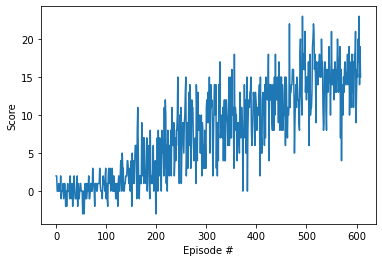

In [9]:
# Set the filename for storage of the trained model
filename = "checkpoints/fifo_memory.pth"

# Set the following parameter to True in case you would like to use the alternative memory
memory_type = 0   # 0 = Fifo memory , 1 = Deque memory

if train:
    scores = train_banana_collector(env, brain_name, maxEpisodes, threshold, \
                           eps_start, eps_end, eps_decay, seed, filename, memory_type)
    
plot_scores(scores)

In [12]:
# Finally test the agent 

agent = load_banana_collector(env, brain_name, filename) # First load the trained agent
n_episode_run = 100                      # Execute 100 runs
scores = test_banana_collector(env, brain_name, agent , n_episode_run)  # run!
print("Mean score over {} episodes: {}".format(n_episode_run, np.mean(scores)))

Using FifoMemory...
Score in episodes 0: 11.0
Score in episodes 1: 0.0
Score in episodes 2: 14.0
Score in episodes 3: 25.0
Score in episodes 4: 18.0
Score in episodes 5: 20.0
Score in episodes 6: 2.0
Score in episodes 7: 15.0
Score in episodes 8: 18.0
Score in episodes 9: 15.0
Score in episodes 10: 14.0
Score in episodes 11: 20.0
Score in episodes 12: 9.0
Score in episodes 13: 17.0
Score in episodes 14: 19.0
Score in episodes 15: 21.0
Score in episodes 16: 14.0
Score in episodes 17: 20.0
Score in episodes 18: 19.0
Score in episodes 19: 16.0
Score in episodes 20: 17.0
Score in episodes 21: 17.0
Score in episodes 22: 20.0
Score in episodes 23: 18.0
Score in episodes 24: 11.0
Score in episodes 25: 12.0
Score in episodes 26: 23.0
Score in episodes 27: 21.0
Score in episodes 28: 23.0
Score in episodes 29: 15.0
Score in episodes 30: 13.0
Score in episodes 31: 19.0
Score in episodes 32: 23.0
Score in episodes 33: 19.0
Score in episodes 34: 7.0
Score in episodes 35: 20.0
Score in episodes 36: 

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.05306808 1.
 0.         0.         0.         0.07424972 0.         0.
 1.         0.         0.48952603 1.         0.         0.
 0.         0.05840093 0.         0.         0.         1.
 0.         1.         0.         0.         0.         0.09647322
 1.         0.         0.         0.         0.07188588 0.
 0.        ]
States have length: 37
Using simple DequeMemory...
Episode 100	Average Score: 0.40 , epsilon: 0.6057704364907278
Episode 200	Average Score: 3.72 , epsilon: 0.36695782172616715
Episode 300	Average Score: 7.11 , epsilon: 0.22229219984074702
Episode 400	Average Score: 9.75 , epsilon: 0.13465804292601349
Episode 500	Average Score: 13.45 , epsilon: 0.08157186144027828
Episode 600	Average Score: 14.44 , epsilon: 0.049413822110038545
Episode 674	Average Score: 15.01 , epsilon: 0.034100160462149656
Environment solved in 674 episodes!	Average Score: 15.01


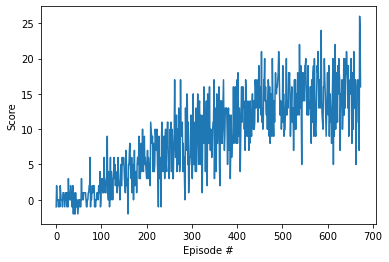

In [13]:
# Set the filename for storage of the trained model
filename = "checkpoints/deque_memory.pth"

# Set the following parameter to True in case you would like to use the alternative memory
memory_type = 1

if train:
    scores = train_banana_collector(env, brain_name, maxEpisodes, threshold, \
                           eps_start, eps_end, eps_decay, seed, filename, memory_type)
    
plot_scores(scores)

Now run the models with 100 episodes and calculate the overage reward

In [14]:
# Finally test the agent 

agent = load_banana_collector(env, brain_name, filename) # First load the trained agent
n_episode_run = 100                      # Execute 10 runs
scores = test_banana_collector(env, brain_name, agent , n_episode_run)  # run!
print("Mean score over {} episodes: {}".format(n_episode_run, np.mean(scores)))

Using FifoMemory...
Score in episodes 0: 18.0
Score in episodes 1: 20.0
Score in episodes 2: 17.0
Score in episodes 3: 17.0
Score in episodes 4: 16.0
Score in episodes 5: 13.0
Score in episodes 6: 15.0
Score in episodes 7: 21.0
Score in episodes 8: 18.0
Score in episodes 9: 18.0
Score in episodes 10: 17.0
Score in episodes 11: 15.0
Score in episodes 12: 16.0
Score in episodes 13: 16.0
Score in episodes 14: 11.0
Score in episodes 15: 17.0
Score in episodes 16: 16.0
Score in episodes 17: 19.0
Score in episodes 18: 21.0
Score in episodes 19: 17.0
Score in episodes 20: 3.0
Score in episodes 21: 17.0
Score in episodes 22: 7.0
Score in episodes 23: 16.0
Score in episodes 24: 21.0
Score in episodes 25: 16.0
Score in episodes 26: 9.0
Score in episodes 27: 16.0
Score in episodes 28: 17.0
Score in episodes 29: 25.0
Score in episodes 30: 17.0
Score in episodes 31: 16.0
Score in episodes 32: 14.0
Score in episodes 33: 21.0
Score in episodes 34: 10.0
Score in episodes 35: 13.0
Score in episodes 36: